# ID: A1821

Date of Submission: 05-03-2019

# 0. Basics of the Sakura Bloom-cycle (5pts total)

In a year, sakura trees basically go through 4 phases: energy production, hibernation, growth, and of course flowering. These phases
roughly follow the seasons, but not exactly. <br>

   Production phase： Initial development of the buds（Summer-Fall） <br>
   Hibernation phase： Bud growth stops while the tree goes into hibernation（Late Fall-Winter） <br>
   Growth phase： Buds once again continue to grow when the tree comes out of its winter hibernation（Late Winter-Spring） <br>
   Flowering phase： The buds finally bloom in spring (as climate conditions allow), once they have been able to fully develop.（Spring） <br>
    
Each year, near the end of winter but before the trees finally bloom, the hibernation period ends. The sakura that rested through the winter once gain become metabolically active, and the buds continue to grow (though we may not immediately notice when this happens.) However, the cycle is not simply clockwork- for example, in places where the temperature is above 20℃ year-round, the trees are unable to hibernate sufficiently, and thus cannot blossom.
    
In this challenge, we have outlined the basic mechanism by which the sakura reach their eventual bloom-date. We consider building a bloom-date prediction model for the case of sakura in Tokyo, with the data split as follows: <br>
    
Test years： 1966, 1971, 1985, 1994, and 2008 <br>
Training years: 1961 to 2017 (Excluding the test years) <br>
    
You should fit the model to the data from the training years, then use the model to predict the bloom-date for each of the test years. The 3 models to be applied to the data are described below.
    


### Problem 0-1: (5pts)
Acquire data of sakura blooming date (桜の開花日) for Tokyo from 1961 to 2018 using the Japanese Meteorological Agency website (気象庁).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings('ignore')

# IMPORTING DATASET

In [2]:
dataset= pd.read_csv('sakura.csv')
train_year=[]
for i in range(1961,2017):
    if (i==1966 or i==1971 or i==1985 or i==1994 or i==2008):
        pass
    else:
        y=i
        train_year.append(y) 
test_year=[1966,1971,1985,1994,2008]
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20544 entries, 0 to 20543
Data columns (total 18 columns):
serial            20544 non-null int64
year              20544 non-null int64
month             20544 non-null int64
day               20544 non-null int64
local pressure    20544 non-null float64
sea pressure      20544 non-null float64
total preci       20544 non-null float64
hr1 preci         20544 non-null float64
min10 preci       20544 non-null float64
avg_temp          20544 non-null float64
max_temp          20544 non-null float64
min_temp          20544 non-null float64
avg humid         20544 non-null int64
min_humid         20544 non-null int64
sun hours         20544 non-null float64
bloom             20544 non-null int64
date              20544 non-null object
days_of_year      20544 non-null int64
dtypes: float64(9), int64(8), object(1)
memory usage: 2.8+ MB


***
## 1. Prediction using the "600 Degree Rule" (15pts total)

For a rough approximaton of the bloom-date, we start with a simple "rule-based" prediction model, called the "600 Degree Rule". The rule consists of logging the maximum temperature of each day, starting  on February 1st, and sum these temperatures until the sum surpasses 600$^\circ$C. The day that this happens is the predicted bloom-date. This 600$^\circ$C threshold is used to easily predict bloom-date in various locations varies by location. However, for more precise predictions, it should be set differently for every location. In this challenge, we verify the accuracy of the "600 Degree Rule" in the case of Tokyo.

### Problem 1-1: (5pts)
From here-on, we refer to the bloom-date in a given year $j$ as $BD_{j}$. For each year in the training data, calculate the accumulated daily maximum temperature from February 1st to the actual bloom-date $BD_{j}$, and plot this accumulated value over the training period. Then, average this accumulated value as $T_{mean}$, and verify whether we should use 600$^\circ$C as a rule for Tokyo.

# GRAPHICAL REPRESENTATION BETWEEN ACCUMULATED TEMPERATURE & ACTUAL BLOOMING DATE

In [3]:
Acc_t=[]
BDj=[]
days=[]

def blossomday(y):
    temp=0
    bd=0
    count=0
    for i in range(0,dataset.shape[0]):
        if dataset['year'][i]==y:
            if dataset['month'][i]>=2:
                if dataset['day'][i]>=1:
                    temp=temp+dataset['max_temp'][i]
                    count+=1
                    if dataset['bloom'][i]==1:
                        bd=dataset['date'][i]
                        break
                

    Acc_t.append(temp)                            
    BDj.append(bd)
    days.append(count)

    return Acc_t, BDj, days

for j in train_year:
    x=blossomday(j)
    
Actual_bloom_days_train=days
print(x)
print("CHERRY BLOSSOM!!!!!!!!")

([720.9999999999999, 768.1000000000001, 701.6999999999999, 676.6000000000001, 642.1999999999997, 660.8000000000001, 654.5999999999999, 724.0000000000001, 696.3000000000001, 610.4, 705.3, 658.0000000000001, 607.9000000000001, 596.6999999999999, 556.7, 640.0999999999998, 631.7999999999998, 640.6000000000001, 600.1, 581.5, 662.4999999999999, 643.7000000000002, 627.4999999999999, 588.7, 649.6999999999999, 583.0999999999999, 573.5999999999998, 688.1999999999999, 615.5, 612.9, 684.6, 680.0999999999999, 614.5999999999999, 679.2, 642.6999999999999, 689.6999999999998, 627.0999999999999, 591.7, 603.7, 627.9, 683.9000000000002, 577.2000000000002, 621.8, 616.6000000000003, 587.1, 646.1, 652.6000000000001, 550.5999999999999, 607.5999999999999, 617.9, 652.4999999999999], ['4/1/1961', '4/1/1962', '4/1/1963', '4/2/1964', '4/2/1965', '3/30/1967', '3/29/1968', '4/6/1969', '4/7/1970', '3/28/1972', '3/31/1973', '4/2/1974', '3/29/1975', '3/22/1976', '3/22/1977', '3/31/1978', '3/23/1979', '3/31/1980', '3/26

In [4]:
Tmean= np.mean(Acc_t)
Tmean

638.7254901960785

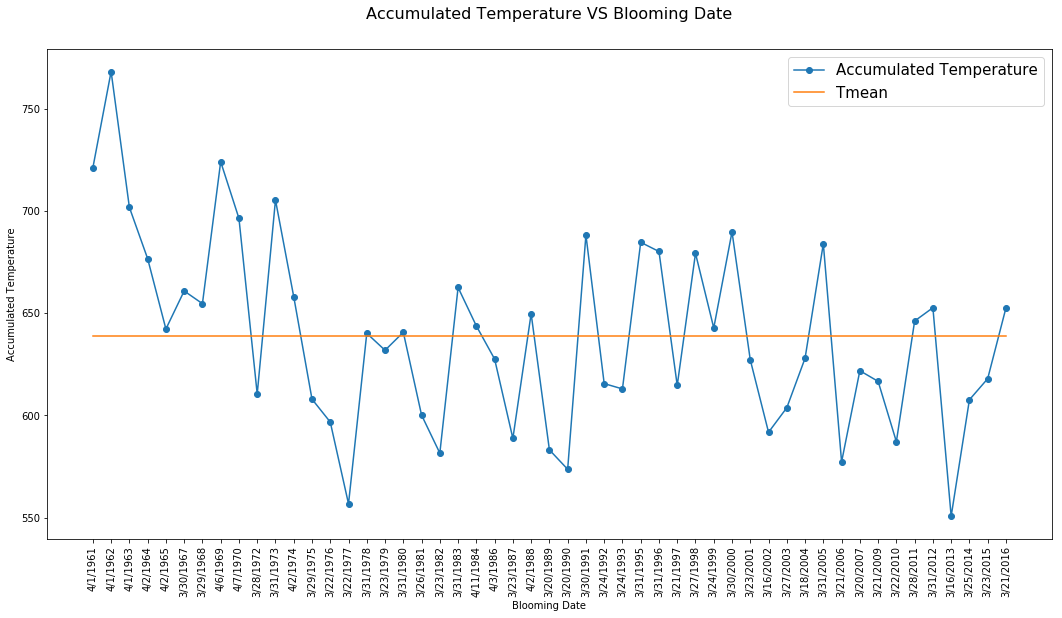

In [5]:
T_mean = [np.mean(Acc_t) for i in Acc_t]
fig,ax = plt.subplots(figsize=(18,9))
ax.plot(BDj, Acc_t,'-o', label='Accumulated Temperature')
ax.plot(BDj,T_mean,label='Tmean')
ax.legend(fontsize=15)
plt.xticks(rotation='vertical')
plt.title('Accumulated Temperature VS Blooming Date',y=1.05,  fontsize=16)
plt.ylabel('Accumulated Temperature')
plt.xlabel('Blooming Date')
plt.show()

As the mean temperature is much more than 600 and the accumulated temperature is fluctuating so the 600 degree rule will not bring better accuracy.

# GRAPHICAL REPRESENTATION BETWEEN ACCUMULATED TEMPERATURE & BLOOMING DATE FOR 600 DEGREE RULE

In [6]:
Acc_t_600=[]
BDj_600=[]
days_600=[]

def blossomday_600(y):
    temp=0
    bd=0
    count=0
    for i in range(0,dataset.shape[0]):
        if dataset['year'][i]==y:
            if dataset['month'][i]>=2:
                if dataset['day'][i]>=1:
                    temp=temp+dataset['max_temp'][i]
                    count+=1
                    if temp >=600:
                        bd=dataset['date'][i]
                        break
                

    Acc_t_600.append(temp)                            
    BDj_600.append(bd)
    days_600.append(count)

    return Acc_t_600, BDj_600, days_600

for j in train_year:
    z=blossomday_600(j)
    
print(z)

([614.6, 609.3000000000002, 609.8, 613.9000000000002, 614.9999999999998, 612.5000000000001, 605.3, 601.8000000000001, 600.6, 610.4, 610.2, 603.7, 607.9000000000001, 611.3, 602.0000000000001, 613.3999999999999, 603.0999999999999, 601.3000000000001, 600.1, 610.6999999999999, 602.8, 612.3000000000001, 614.2999999999998, 608.3000000000001, 609.9999999999999, 608.0999999999999, 605.3999999999997, 603.0, 601.1, 612.9, 608.0, 607.8, 614.5999999999999, 603.5, 604.1, 608.1999999999997, 608.9999999999999, 612.3000000000001, 603.7, 608.4, 608.4000000000002, 604.9000000000002, 609.0, 601.1000000000003, 601.8000000000001, 609.8, 614.3000000000002, 612.8, 607.5999999999999, 600.9, 602.9999999999999], ['3/25/1961', '3/19/1962', '3/27/1963', '3/30/1964', '3/31/1965', '3/27/1967', '3/25/1968', '3/29/1969', '3/31/1970', '3/28/1972', '3/25/1973', '3/30/1974', '3/29/1975', '3/23/1976', '3/25/1977', '3/29/1978', '3/21/1979', '3/29/1980', '3/26/1981', '3/25/1982', '3/26/1983', '4/9/1984', '4/2/1986', '3/24/

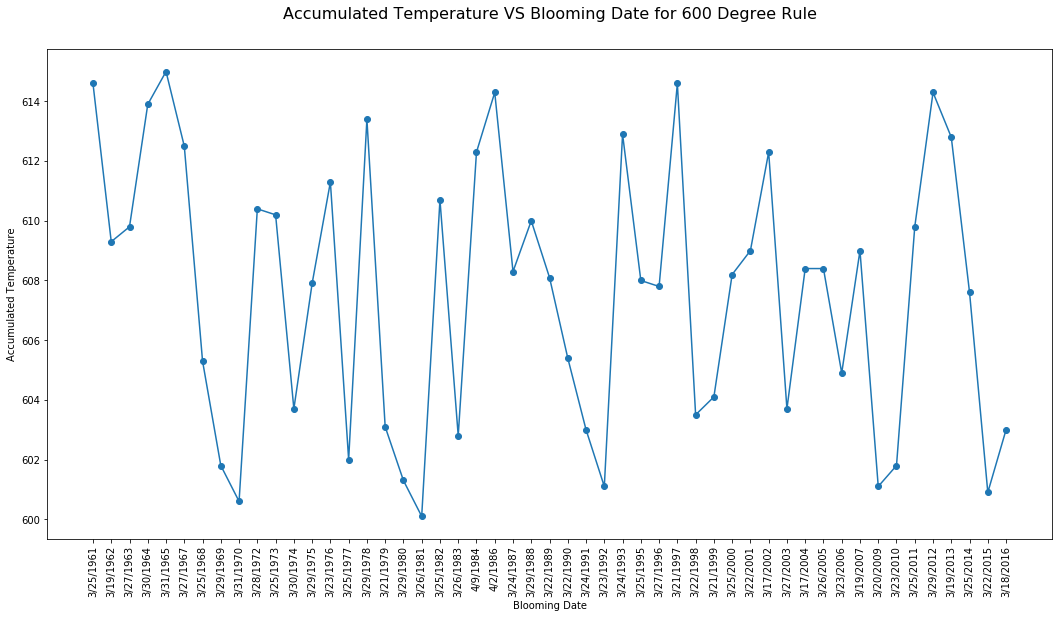

In [7]:
fig = plt.subplots(figsize=(18,9))
plt.plot(BDj_600, Acc_t_600,'-o')
plt.xticks(rotation='vertical')
plt.title('Accumulated Temperature VS Blooming Date for 600 Degree Rule',y=1.05,  fontsize=16)
plt.ylabel('Accumulated Temperature')
plt.xlabel('Blooming Date')
plt.show()

### Problem 1-2: (10pts)

Use the average accumulated value $T_{mean}$ calculated in 1-1 to predict $BD_{j}$ for each test year, and show the error from the actual $BD_{j}$. Compare to the prediction results when 600$^\circ$C is used a threshold value, and evaluate both models using the coefficient of determination ($R^2$ score).

# PREDICTION FOR  $T_{mean}$

In [8]:
BD_pred=[]
days_pred=[]

def predict_blossom(y):
    temp=0
    count=0
    for i in range(0,dataset.shape[0]):
        if dataset['year'][i]==y:
            if dataset['month'][i]>=2:
                if dataset['day'][i]>=1:
                    temp=temp+dataset['max_temp'][i]
                    count+=1
                    if temp >=Tmean:
                        bd_p=dataset['date'][i]
                        break
                                            
    BD_pred.append(bd_p)
    days_pred.append(count)
    
    return BD_pred, days_pred

for j in test_year:
    x=predict_blossom(j)
print(x)
print("PREDICTED CHERRY BLOSSOM!!!!!!!!")

(['3/23/1966', '3/29/1971', '4/1/1985', '3/31/1994', '3/25/2008'], [51, 57, 60, 59, 54])
PREDICTED CHERRY BLOSSOM!!!!!!!!


In [9]:
BDj_test=[]
Actual_days=[]

def test_blossom(y):
    count=0
    for i in range(0,dataset.shape[0]):
        if dataset['year'][i]==y:
            if dataset['month'][i]>=2:
                if dataset['day'][i]>=1:
                    count+=1
                    if dataset['bloom'][i]==1:
                        break
    Actual_days.append(count)

    return Actual_days

for j in test_year:
    y_test=test_blossom(y=j)
    
print(y_test)
print("ACTUAL CHERRY BLOSSOM!!!!!!!!")

[48, 58, 62, 59, 51]
ACTUAL CHERRY BLOSSOM!!!!!!!!


# ERROR CALCULATION FOR $T_{mean}$

In [10]:
y_true = Actual_days
y_pred = days_pred
e = np.subtract(y_true,y_pred)
e

array([-3,  1,  2,  0, -3])

# $R^2$ SCORE FOR $T_{mean}$

In [11]:
y_true = Actual_days
y_pred = days_pred
r2_score(y_true, y_pred)

0.8323615160349854

# PREDICTION USING 600$^\circ$C

In [12]:
BD_pred_600=[]
days_600=[]

def predict_blossom_600(y):
    temp=0
    count=0
    for i in range(0,dataset.shape[0]):
        if dataset['year'][i]==y:
            if dataset['month'][i]>=2:
                if dataset['day'][i]>=1:
                    temp=temp+dataset['max_temp'][i]
                    count+=1
                    if temp >= 600:
                        bd_p=dataset['date'][i]
                        break
                                            
    BD_pred_600.append(bd_p)
    days_600.append(count)

    return BD_pred_600, days_600

for j in test_year:
    z=predict_blossom_600(j)
      
print(z)
print("PREDICTED CHERRY BLOSSOM FOR 600 DEGREE RULE!!!!!!!!")

(['3/20/1966', '3/27/1971', '3/29/1985', '3/28/1994', '3/23/2008'], [48, 55, 57, 56, 52])
PREDICTED CHERRY BLOSSOM FOR 600 DEGREE RULE!!!!!!!!


# $R^2$  SCORE FOR 600$^\circ$C

In [13]:
y_true = Actual_days
y_pred = days_600
r2_score(y_true, y_pred)

0.6793002915451896

As expected 600 degree rule has shown poor $R^2$ score.

***
## 2. Linear Regression Model: Transform to Standard Temperature (30pts total)

The year to year fluctuation of the bloom-date depends heavily upon the actual temperature fluctuation (not just the accumulated maximum). In order to get to a more physiologically realistic metric,  Sugihara et al. (1986) considered the actual effect of temperature on biochemical activity. They introduced a method of "standardizing" the temperatures measured, according to the fluctuation relative to a standard temperature.

In order to make such a standardization, we apply two major assumptions, outlined below.

#### 1) The Arrhenius equation: <br>

The first assumption, also known in thermodynamics as the "Arrhenius equation", deals with chemical reaction rates and can be written as follows:

$$
k = A \exp{ \Bigl(- \frac{E_{a}}{RT}} \Bigr)
$$ <br>

Basically, it says that each reaction has an activation energy, $E_{a}$ and a pre-exponential factor $A$. Knowing these values for the particular equation, we can find the rate constant $k$ if we know the temperature, $T$, and applying the universal gas constant, $R = 8.314 \rm [J/K・mol]$.

#### 2) Constant output at constant temperature: <br>

The second assumption, is simply that the output of a reaction is a simple product of the duration and the rate constant $k$, and that product is constant even at different temperatures.
    
$$
tk = t'k' = t''k'' = \cdots = \rm{const}
$$ <br>


Making the assumptions above, we can determine a "standard reaction time", $t_{s}$ required for the bloom-date to occur. We can do so in the following way:

<br>
$$
t_{s} = \exp \Bigl( \frac{E_{a}(T_{i, j} - T_{s})}{RT_{i, j}T_{s}}\Bigr)
$$ <br>

We define $T_{i, j}$ as the daily average temperature, and use a standard temperature of $T_{s} = 17^\circ\rm{C}$. For a given year $j$, with the last day of the hibernation phase set as $D_ {j}$, we define the number of "transformed temperature days",  $DTS_{ J}$,  needed to reach from $D_ {j}$ to the bloom-date $BD_{j}$ with the following equation:


<br>
$$
DTS_{j} = \sum_{i=D_{j}}^{BD_{j}} t_{s} = \sum_{i=D_{j}}^{BD_{j}} \exp \Bigl( \frac{E_{a}(T_{i, j} - T_{s})}{RT_{i, j}T_{s}}\Bigr)
$$ <br>



From that equation, we can find the average $DTS$ for $x$ number of years ($DTS_{ mean}$) as follows: 

<br>
$$
\begin{align}
DTS_{\rm{mean}} &= \frac{1}{x} \sum_{j}^{x} DTS_{j} \\
&= \frac{1}{x} \sum_{j}^{x} \sum_{i=D_{j}}^{BD_{j}} \exp \Bigl( \frac{E_{a}(T_{i, j} - T_{s})}{RT_{i, j}T_{s}}\Bigr)
\end{align}
$$ <br> <br>

In this exercise, we assume that $DTS_{ mean}$ and $E_{ a}$ are constant values, and we use the data from the training years to fit these 2 constants. The exercise consists of 4 steps:
1. Calculate the last day of the hibernation phase $D_ {j}$ for every year $j$.
2. For every year $j$, calculate $DTS_{ j}$ as a function of $E_{ a}$, then calculate the average (over training years) $DTS_{ mean}$ also as a function of $E_{ a}$.
3. For every year $j$, and for every value of $E_{ a}$, accumulate $t_{s}$ from $D_ {j}$ and predict the bloom date $BD_{j}^{\rm{pred}}$ as the day the accumulated value surpasses $DTS_{ mean}$. Calculate the bloom date prediction error as a function of $E_{ a}$, and find the optimal $E_{ a}$ value that minimizes that error.
4. Use the previously calculated values of $D_ {j}$, $DTS_{ mean}$, and $E_{ a}$ to predict bloom-day on years from the test set.


### Problem 2-1: (5pts)
According to Hayashi et al. (2012), the day on which the sakura will awaken from their hibernation phase, $D_{j}$, for a given location, can be approximated by the following equation:
<br> <br>
$$
D_{j} = 136.75 - 7.689 \phi + 0.133 \phi^{2} -1.307\ln L + 0.144T_{F} + 0.285T_{F}^2
$$ <br>

where $\phi$ is the latitude [°N], $L$ is the distance from the nearest coastline [km], and $T_{F}$ is that location's average temperature [°C] over the first 3 months of a given year. In the case of Tokyo, $\phi = 35°40'$ and $L=4\rm{km}$.

Find the $D_{j}$ value for every year $j$ from 1961 to 2017 (including the test years), and plot this value on a graph. 

(In Problem 1, we had assumed a $D_j$ of February 1st.)

# END OF HIBERNATION PHASE $D_j$

In [14]:
Phi = 35.6667
L = 4

tf=[]
def AVG_temp(y):
    temp=0
    count=0
    for i in range(0,dataset.shape[0]):
        if dataset['year'][i]==y:
            if dataset['month'][i] < 4:
                if dataset['day'][i]>=1:
                    temp=temp+dataset['avg_temp'][i]
                    count+=1
    mean_temp = temp/count
                                            
    tf.append(mean_temp)
    return tf

for j in range(1961,2017):
    TF = AVG_temp(j)
print(TF)

[5.471111111111112, 6.254444444444444, 5.2155555555555555, 5.752747252747253, 5.354444444444446, 7.13888888888889, 6.334444444444444, 6.740659340659338, 6.438888888888887, 5.335555555555556, 6.445555555555556, 7.164835164835163, 6.985555555555558, 5.601111111111112, 5.90888888888889, 7.037362637362637, 5.918888888888888, 6.23, 8.307777777777776, 6.364835164835164, 6.262222222222222, 7.082222222222221, 6.983333333333333, 4.246153846153847, 6.110000000000001, 5.548888888888889, 7.328888888888888, 7.035164835164836, 8.413333333333336, 7.797777777777776, 7.487777777777776, 7.810989010989011, 7.519999999999998, 6.727777777777776, 7.2411111111111115, 7.093406593406592, 8.153333333333332, 7.514444444444448, 7.834444444444443, 7.684615384615386, 7.132222222222222, 9.234444444444446, 6.87111111111111, 8.218681318681316, 7.112222222222224, 7.205555555555556, 9.05, 7.4021978021978025, 8.193333333333335, 7.574444444444443, 6.704444444444444, 6.376923076923077, 7.992222222222222, 7.604444444444446,

In [15]:
Dj=[]
for i in range (0,len(TF)):
    dj = 136.75 - (7.689 * Phi) + (0.133 * np.square(Phi)) - (1.307 * np.log(L)) + (0.144 * TF[i]) + (0.285 * np.square(TF[i]))
    Dj.append(dj)
Dj = np.round(Dj)
Dj = Dj.astype(int) 
Dj

array([39, 42, 38, 40, 39, 45, 42, 44, 43, 39, 43, 46, 45, 40, 41, 45, 41,
       42, 51, 42, 42, 45, 45, 36, 41, 39, 46, 45, 51, 48, 47, 48, 47, 44,
       46, 45, 50, 47, 49, 48, 45, 56, 44, 50, 45, 46, 55, 47, 50, 47, 44,
       42, 49, 47, 46, 48])

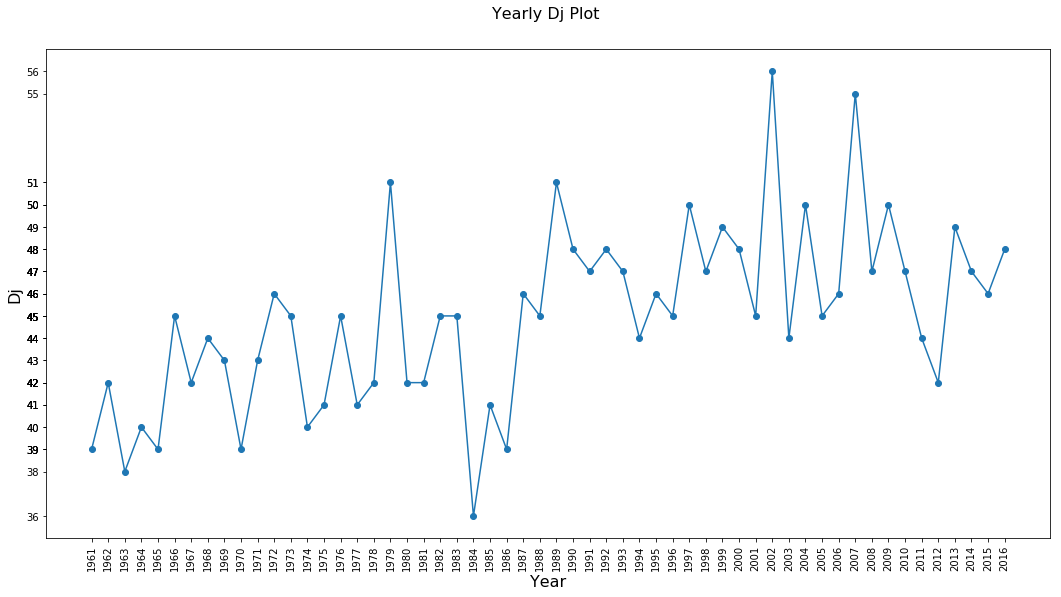

In [16]:
year=[]
for i in range(1961,2017):
    y=i
    year.append(y)

fig = plt.subplots(figsize=(18,9))
plt.plot(year,Dj,'-o')
plt.xticks(year,rotation='vertical')
plt.yticks(Dj)
plt.title('Yearly Dj Plot ',y=1.05,  fontsize=16)
plt.ylabel('Dj', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.show()

### Problem 2-2: (10pts)
Calcluate $DTS_j$ for each year $j$ in the training set for discrete values of $E_{a}$, varying from 5 to 40kcal ($E_{a} = 5, 6, 7, \cdots, 40 \,\rm{kcal}$), and plot this $DTS_j$ against $E_{a}$. Also calculate the average of $DTS_{j}$ over the training period, and indicate it on the plot as $DTS_{mean}$. Pay attention to the units of **every parameter** ($T_{i,j}$, $E_{a}$, ...) in the equation for $t_{s}$. 


# $DTS_j$ 

In [17]:
Ts=290
R=8.314
DTsj=[]

def DTS_value(y,d,Ea):
    dtsj=0
    for i in range(0,dataset.shape[0]):
        if dataset['year'][i]==y:
            if dataset['month'][i] >= 1:
                if dataset['days_of_year'][i]>=d:
                    Tij=dataset['avg_temp'][i]
                    dts = np.exp((Ea*((Tij+273)-Ts))/(R*(Tij+273)*Ts))
                    dtsj=dtsj+dts
                    if dataset['bloom'][i]==1:
                        break        
    DTsj.append(dtsj)                                          
    return DTsj

def days(x):
    b= Dj[x]
    return b

for k in range(5,41):
    for j in train_year:
            p=k*4184
            dd=days(j-1961)
            Dtsj = DTS_value(j,dd,p)
DTSj = []
step = 51
for i in range( 0 ,len(Dtsj),step):
    x = []
    x = Dtsj[i:i+step]
    DTSj.append(x)
print(DTSj)

[[38.89769556426726, 37.30460029876837, 39.56294183124742, 39.13490839252265, 38.84196312189919, 36.109247474596835, 34.7275534733371, 40.35778221200484, 42.68421060657547, 32.461417035988674, 34.85073122636519, 38.883952749171556, 34.72872726582, 29.35540180770162, 30.753648519045285, 36.139764228340084, 24.770770464996836, 37.01737734239532, 32.941732898182345, 29.410740600455526, 34.56158502211131, 46.79825478709449, 39.95349590277867, 27.609257604243957, 36.18616913325681, 22.579325993917173, 26.10438995377958, 33.310693594230166, 28.561649729133467, 28.063460932992186, 34.45593546653786, 35.70243877338502, 24.606709713912434, 30.91780775638544, 27.729016979273887, 32.60651040524442, 29.587890973443294, 16.775455329392642, 32.11999789344788, 23.51824298804785, 35.08743360009604, 27.297485641856607, 19.508844329082205, 24.28598763955959, 27.736886932186852, 33.14217190155449, 37.481295506978356, 21.205957890282377, 29.306834872371354, 28.550943308709293, 26.496934059582916], [36.605

In [18]:
dtsj2=[]
for j in range(0,51):
    DTSj1=[]
    k=0
    k=k+j
    for i in range(0,36):
        x=Dtsj[k]
        k=k+51
        DTSj1.append(x)
    dtsj2.append(DTSj1)
print(dtsj2)  

[[38.89769556426726, 36.60545640953776, 34.4616009836588, 32.45594153491262, 30.579019189632998, 28.822050113163815, 27.176875754549435, 25.635916858013626, 24.19213094938714, 22.83897302872274, 21.570359221555908, 20.380633160782477, 19.264534889070177, 18.21717208822814, 17.233993457143146, 16.310764073862973, 15.443542590262377, 14.62866011955871, 13.862700687833502, 13.142483130740308, 12.465044325808059, 11.82762365924668, 11.227648633987362, 10.66272153289714, 10.13060705774687, 9.629220870627933, 9.156618970148877, 8.710987839936502, 8.290635311752549, 7.8939820899490645, 7.519553888053186, 7.165974132022215, 6.831957188168446, 6.516302076942555, 6.217886636706651, 5.935662104342145], [37.30460029876837, 35.21144682767743, 33.245105027650645, 31.397456111862756, 29.660923525551475, 28.02843551954815, 26.49339037475648, 25.04962408591471, 23.691380327064998, 22.413282534193325, 21.21030795257102, 20.07776350750042, 19.011263367507038, 18.006708078594777, 17.060265157042842, 16.16

# $DTS_{mean}$ 

In [19]:
DTSmean=[]
for i in range(0,len(DTSj)):
    mean=np.mean(DTSj[i])
    DTSmean.append(mean)
print(DTSmean)
ea=[]
for i in range(5,41):
    x=i
    ea.append(x)

[31.976161406442163, 30.270918261940064, 28.669365495057768, 27.164709059067174, 25.750625149740745, 24.42122621319361, 23.171029501755896, 21.994927980787278, 20.888163405018624, 19.84630139740107, 18.865208376667056, 17.941030191958113, 17.070172334040386, 16.249281602891738, 15.475229120879186, 14.745094589420518, 14.056151695001624, 13.405854577759333, 12.791825282590207, 12.211842118957225, 11.663828861283221, 11.145844727081322, 10.65607507481748, 10.192822767960429, 9.754500155782791, 9.339621625261191, 8.946796681909623, 8.574723520593002, 8.22218305032877, 7.888033339813933, 7.571204452931362, 7.270693645809868, 6.985560899152994, 6.714924761525906, 6.457958481111697, 6.213886405129524]


# PLOTING $DTS_j$ & $DTS_{mean}$ AGAINST $E_{a}$  

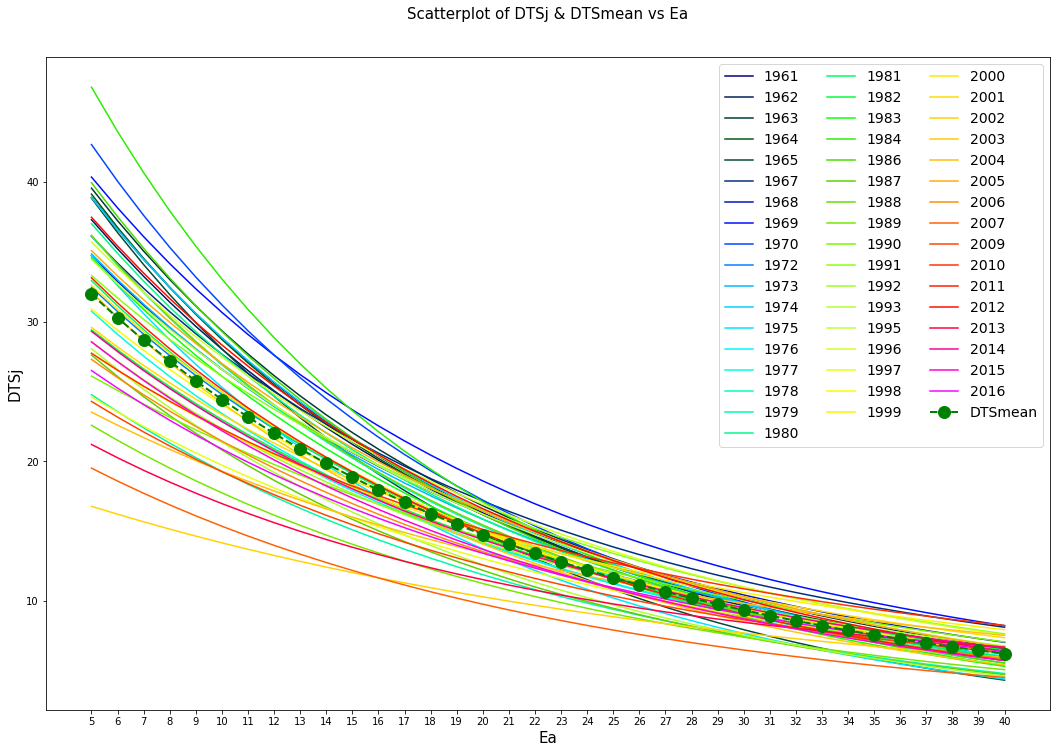

In [20]:
plt.figure(figsize=(18,12))
num_plots = 51
colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(cycler('color', [colormap(i) for i in np.linspace(0, 0.8, num_plots)]))
for i in range(0,51):
    plt.plot(ea,dtsj2[i],label=("%d")%(train_year[i]))
plt.plot(ea,DTSmean,'go--', linewidth=2, markersize=12,label='DTSmean')
plt.legend(fontsize=14,ncol=3)
plt.title('Scatterplot of DTSj & DTSmean vs Ea',y=1.05,fontsize=15)
plt.ylabel('DTSj',fontsize=15)
plt.xlabel('Ea',fontsize=15)
plt.xticks(ea)
plt.show()

### Problem 2-3: (11pts)
Using the same $E_{a}$ values and calculated $DTS_{mean}$ from 2-2, predict the bloom date $BD_{j}$ for each of the training years. Find the mean squared error relative to the actual $BD$ and plot it against $E_{a}$. Find the optimal $E_{a}^{*}$ that minimizes that error on the training data.

# $BD_{j}$ PREDICTION FOR $DTS_{mean}$

In [21]:
Ts=290
R=8.314
DTsj=[]

def DTS_pred_train(y,d,Ea,Dmean):
    dtsj=0
    for i in range(0,dataset.shape[0]):
        if dataset['year'][i]==y:
            if dataset['month'][i] >= 1:
                if dataset['days_of_year'][i]>=d:
                    Tij=dataset['avg_temp'][i]
                    dts = np.exp((Ea*((Tij+273)-Ts))/(R*(Tij+273)*Ts))
                    dtsj=dtsj+dts
                    if dtsj> Dmean:
                        bddj = dataset['days_of_year'][i]
                        DTsj.append(bddj)
                        break        
                                              
    return DTsj

def days(x):
    b= Dj[x]
    return b

for k in range(5,41):
    for j in train_year:
            p=k*4184
            dd=days(j-1961)
            dmn=DTSmean[k-5]
            Dtsj = DTS_pred_train(j,dd,p,dmn)
            
BDj_train = []
step = 51
for i in range( 0 ,len(Dtsj),step):
    x = []
    x = Dtsj[i:i+step]
    BDj_train.append(x)
print(BDj_train)

[[83, 85, 83, 85, 84, 85, 86, 86, 84, 88, 87, 84, 85, 86, 83, 86, 90, 86, 84, 86, 87, 84, 84, 88, 88, 91, 86, 88, 89, 88, 88, 87, 89, 88, 89, 90, 85, 92, 86, 89, 87, 86, 93, 90, 87, 86, 85, 87, 87, 87, 88], [83, 85, 83, 86, 84, 85, 86, 87, 85, 88, 87, 84, 86, 86, 83, 86, 90, 86, 84, 86, 87, 85, 84, 88, 88, 91, 86, 88, 88, 88, 88, 87, 89, 87, 88, 90, 85, 92, 86, 89, 87, 86, 92, 90, 87, 86, 85, 87, 87, 87, 88], [84, 85, 84, 87, 85, 85, 86, 87, 86, 88, 87, 84, 86, 86, 83, 86, 90, 86, 85, 85, 87, 86, 85, 88, 88, 91, 85, 88, 88, 88, 88, 88, 89, 87, 88, 90, 84, 91, 87, 89, 87, 85, 92, 90, 86, 86, 85, 86, 87, 86, 88], [84, 85, 84, 87, 85, 85, 86, 87, 86, 88, 88, 85, 86, 86, 83, 86, 89, 87, 85, 85, 88, 87, 85, 88, 89, 90, 84, 87, 88, 88, 87, 88, 88, 87, 87, 90, 84, 90, 87, 88, 87, 85, 91, 89, 86, 86, 86, 86, 87, 86, 88], [84, 85, 85, 88, 86, 85, 86, 87, 87, 88, 88, 85, 87, 85, 83, 87, 89, 87, 85, 85, 88, 88, 86, 88, 89, 90, 84, 87, 88, 87, 87, 88, 88, 87, 87, 90, 84, 89, 87, 88, 87, 85, 91, 89

# MSE

In [22]:
days=[]

def blossomday(y):
    temp=0
    bd=0
    count=0
    for i in range(0,dataset.shape[0]):
        if dataset['year'][i]==y:
            if dataset['bloom'][i]==1:
                bd=dataset['days_of_year'][i]
    days.append(bd)

    return  days

for j in train_year:
    x=blossomday(j)
    
Actual_bloom_days_train=days
print(Actual_bloom_days_train)
print("CHERRY BLOSSOM!!!!!!!!")

[91, 91, 91, 93, 92, 89, 89, 96, 97, 88, 90, 92, 88, 82, 81, 90, 82, 91, 85, 82, 90, 102, 93, 82, 93, 79, 79, 89, 84, 83, 90, 91, 80, 86, 83, 90, 82, 75, 86, 78, 90, 80, 79, 80, 81, 87, 91, 75, 84, 82, 81]
CHERRY BLOSSOM!!!!!!!!


In [23]:
MSE=[]
for i in range(0,len(BDj_train)):
    y_true = Actual_bloom_days_train
    y_pred = BDj_train[i]
    e=mean_squared_error(y_true, y_pred)
    MSE.append(e)
MSE

[53.529411764705884,
 50.6078431372549,
 45.705882352941174,
 40.84313725490196,
 37.09803921568628,
 33.72549019607843,
 29.941176470588236,
 27.54901960784314,
 24.254901960784313,
 21.627450980392158,
 19.58823529411765,
 17.431372549019606,
 15.705882352941176,
 14.196078431372548,
 12.098039215686274,
 11.72549019607843,
 10.745098039215685,
 10.176470588235293,
 9.647058823529411,
 9.03921568627451,
 8.803921568627452,
 8.882352941176471,
 8.686274509803921,
 8.254901960784315,
 8.333333333333334,
 8.372549019607844,
 8.549019607843137,
 8.843137254901961,
 9.196078431372548,
 9.72549019607843,
 10.0,
 10.549019607843137,
 10.529411764705882,
 11.117647058823529,
 11.72549019607843,
 12.509803921568627]

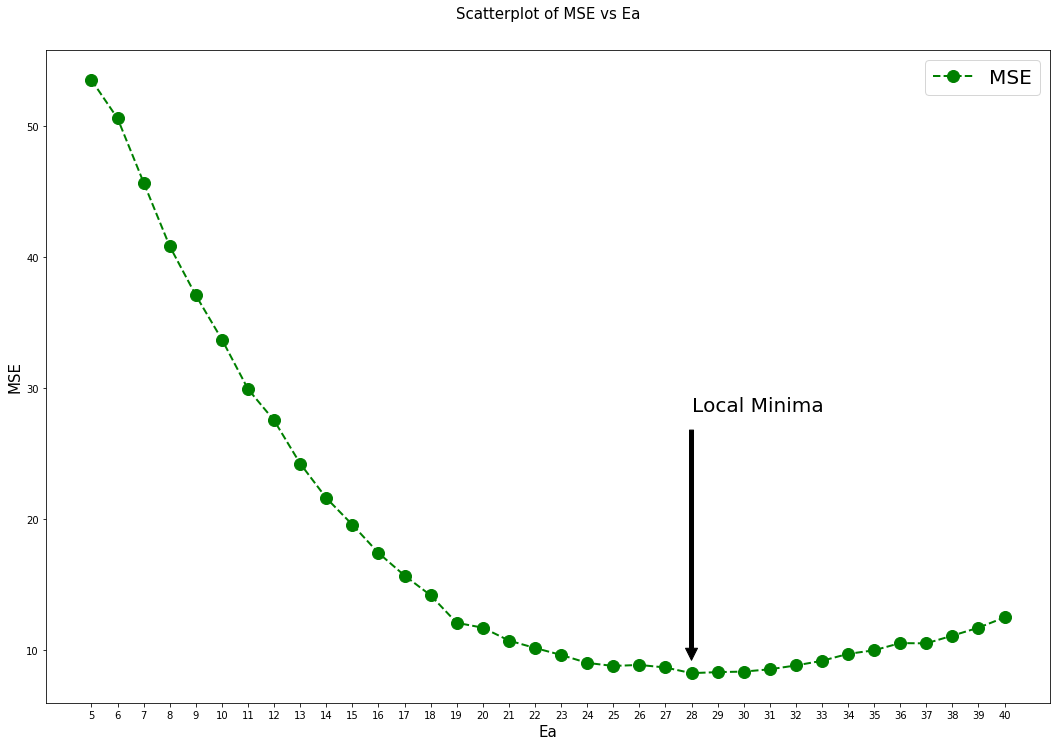

In [24]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
plt.plot(ea,MSE,'go--', linewidth=2, markersize=12,label='MSE')
plt.legend(fontsize=20)
plt.title('Scatterplot of MSE vs Ea',y=1.04,fontsize=15)
plt.ylabel('MSE',fontsize=15)
plt.xlabel('Ea',fontsize=15)
plt.xticks(ea)
ymin = min(MSE)
xpos = MSE.index(ymin)
xmin = ea[xpos]
ax.annotate('Local Minima',fontsize=20,xy=(xmin,ymin),xytext=(xmin, ymin+20),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

# OPTIMAL $E_{a}^{*}$

In [25]:
Optimal_Ea=ea[MSE.index(min(MSE))]
print('Optimal_Ea: ',Optimal_Ea)

Optimal_Ea:  28


# $DTS_{mean}$ FOR OPTIMAL $E_{a}^{*}$

In [26]:
Optimal_DTSmean=DTSmean[ea.index(Optimal_Ea)]
Optimal_DTSmean

10.192822767960429

### Problem 2-4: (4pts)

Using the $D_j$ dates from problem 2-1, the average $DTS_{mean}$ from 2-2, and the best-fit $E_{a}^{*}$ from 2-3, predict the bloom-dates $BD_j$ for the years in the test set. Determine the error between your predicted $BD_j$ values and the actual values, and evaluate this model using the coefficient of determination ($R^2$ score).

# $BD_j$ PREDICTION FOR $DTS_{mean}$ FOR BEST FITTED $E_{a}^{*}$

In [27]:
Ts=290
R=8.314
DTS_pred=[]

def DTS_value_test(y,d):
    dtsj=0
    Ea=28*4184
    Dmean=Optimal_DTSmean
    for i in range(0,dataset.shape[0]):
        if dataset['year'][i]==y:
            if dataset['month'][i] >= 1:
                if dataset['days_of_year'][i]>=d:
                    Tij=dataset['avg_temp'][i]
                    dts = np.exp((Ea*((Tij+273)-Ts))/(R*(Tij+273)*Ts))
                    dtsj=dtsj+dts
                    if dtsj> Dmean:
                        bddj = dataset['days_of_year'][i]
                        DTS_pred.append(bddj)
                        break        
                                              
    return DTS_pred

def days(x):
    b= Dj[x]
    return b

for j in test_year:
    dd=days(j-1961)
    Dtsj_test = DTS_value_test(j,dd)
                 
print ('Prediction:',Dtsj_test)

Prediction: [79, 88, 91, 91, 83]


In [28]:
days_test=[]

def blossomday_test(y):
    temp=0
    bd=0
    count=0
    for i in range(0,dataset.shape[0]):
        if dataset['year'][i]==y:
            if dataset['bloom'][i]==1:
                bd=dataset['days_of_year'][i]
    days_test.append(bd)

    return  days_test

for j in test_year:
    x=blossomday_test(j)
    
Actual_bloom_days_test=days_test
print('Actual_bloom_days_test:',Actual_bloom_days_test)

Actual_bloom_days_test: [79, 89, 93, 90, 82]


# ERROR CALCULATION

In [29]:
y_true = Actual_bloom_days_test
y_pred = DTS_pred
e = np.subtract(y_true,y_pred)
e

array([ 0,  1,  2, -1, -1], dtype=int64)

# $R^2$ SCORE FOR $DTS_{mean}$

In [30]:
y_true = Actual_bloom_days_test
y_pred = DTS_pred
r2_score(y_true, y_pred)

0.9489795918367347

### Problem 2-5: (extra 10pts)
Discuss any improvements you could make to the model outlined above. If you have a suggestion in particular, describe it. How much do you think the accuracy would be improved?

# SUGGESTIONS TO IMPROVE THE MODEL 

1. According to the mentioned model and datasets, there is an assumption that the average temperature of a single day is sustained throughout the day. This is not the case in real life as the temperature can flactuate even from hour to hour. So if the fluctuations of the temperature could be added, the accuracy and could possibly be improved.

2. There are different species of cherry trees from the Prunus genus. Different species of trees might have different type if implecations to different changes of variables. We did not take that into account. If we can take those things into consideration, accuracy might be improved.

3. Only temperature is not factor that is responsible for blooming. Other factors like humidity, pressure, rainfall, sun hours also have direct impact on blooming. These are not accounted while calculating DTSmean.

4. Catalyst in soil also enhance the blooming phenomenon. Which is not accounted here.

5. The Arrhenius equation is a formula for the temperature dependence of reaction rates. Both the Arrhenius activation energy and the rate constant k are experimentally determined, and represent macroscopic reaction-specific parameters that are not simply related to threshold energies and the success of individual collisions at the molecular level. Currently, it is best seen as an empirical relationship. So for DTSj more relative equation can be derived.

 By following these steps the accuracy can be improved a little as already the accuracy is more than 94% .

***
## 3. Predicting Bloom-date via Neural Network (30pts total)

### Problem 3-1: (20pts)

Build a neural network and train it on the data from the training years. Use this model to predict the bloom-dates for each year in the test set. Evaluate the error between predicted dates and actual dates using the coefficient of determination (R2 score). Only use the weather data given in `tokyo.csv` and the sakura data acquired in problem 0-1.</br>
You may use whichever framework or strategy that you like to construct the network. 

# NN MODEL

In [31]:
df=dataset
days=[]
def blossomday(y):
    temp=0
    bd=0
    count=0
    for i in range(0,df.shape[0]):
        if df['year'][i]==y:
            if df['bloom'][i]==1:
                bd=df['days_of_year'][i]
    days.append(bd)

    return  days

for j in train_year:
    x=blossomday(j)
    
Y_train=days
print(Y_train)

[91, 91, 91, 93, 92, 89, 89, 96, 97, 88, 90, 92, 88, 82, 81, 90, 82, 91, 85, 82, 90, 102, 93, 82, 93, 79, 79, 89, 84, 83, 90, 91, 80, 86, 83, 90, 82, 75, 86, 78, 90, 80, 79, 80, 81, 87, 91, 75, 84, 82, 81]


In [32]:
df=df[df.month <=4]
col_drop=['serial','year','month','day','bloom','date','days_of_year'] 

In [33]:
X_train=[]
for i in range (0,51):
    s=df[df.year.isin([train_year[i]])]
    s=s.drop(col_drop,1)
    s=np.sum(s,axis=0)
    X_train=X_train+[s]
    
X_test=[]
for i in range (5):
    s=df[df.year.isin([test_year[i]])]
    s=s.drop(col_drop,1)
    s=np.sum(s,axis=0)
    X_test=X_test+[s]

In [34]:
hl=[10 for i in range(21)]
hl=tuple(hl)
clf=MLPRegressor(hidden_layer_sizes=hl,activation='identity',solver="lbfgs",
                                        alpha=18,learning_rate='invscaling',random_state=10)
clf.fit(X_train,Y_train)
nn_pred=clf.predict(X_test)
nn_pred=[int(i) for i in nn_pred]
nn_pred

[81, 91, 92, 89, 81]

Here hyperparameter is tuned through trial and error and set to the best value or $R^2$ score. Gridsearch isn't used due to computational difficulties.

# $R^2$ SCORE FOR NN MODEL

In [35]:
y_true = Actual_bloom_days_test
y_pred = nn_pred
r2_score(y_true, y_pred)

0.9198250728862973

### Problem 3-2: (10pts)
Compare the performance (via $R^2$ score) of the 3 implementations above: the 600 Degree Rule, the DTS method, and the neural network approach. For all methods, and each test year, plot the predicted date vs. the actual date. Discuss the accuracy and differences of these 3 models.

# COMPARISON OF PERFORMANCE OF 600 DEGREE RULE, DTS METHOD & NEURAL NETWORK MODELS

$R^2$ score (600 Degree Rule) : 0.6793002915451896

$R^2$ score (DTS Method) : 0.9489795918367347

$R^2$ score (NN Model) : 0.9198250728862973

# GRAPHICAL COMPARISON OF 600 DEGREE RULE, DTS METHOD & NEURAL NETWORK

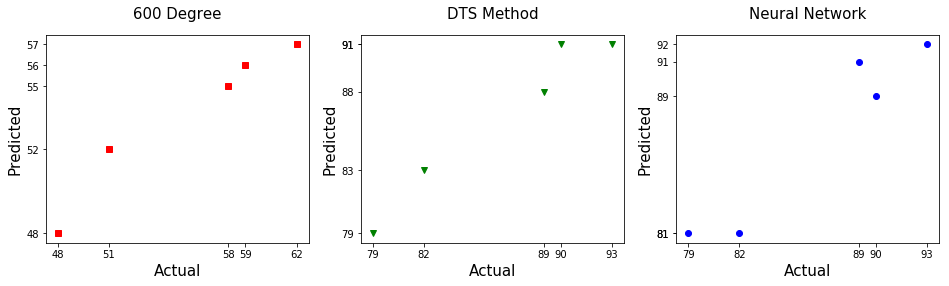

In [36]:
plt.figure(figsize=(16,13))
plt.subplot(3,3,1)
plt.plot(Actual_days, days_600, 'rs')
plt.title('600 Degree',y=1.05,fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.xlabel('Actual',fontsize=15)
plt.xticks(Actual_days)
plt.yticks(days_600)

plt.subplot(3,3,2)
plt.plot(Actual_bloom_days_test,Dtsj_test,'gv')
plt.title('DTS Method',y=1.05,fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.xlabel('Actual',fontsize=15)
plt.xticks(Actual_bloom_days_test)
plt.yticks(Dtsj_test)


plt.subplot(3,3,3)
plt.plot(Actual_bloom_days_test,nn_pred,'bo')
plt.title('Neural Network',y=1.05,fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.xlabel('Actual',fontsize=15)
plt.xticks(Actual_bloom_days_test)
plt.yticks(nn_pred)
plt.show()

# DISCUSSION

DTS method has shown better accuracy than the others. As it is calculated using some proved method. 600 degree rule hypothesis showed poor results which is because it is based on assumptions not any proven method. Neural network used all the features from weather dataset. It is basically an LSTM time series analysys. Here in this NN model only parameter is tuned no LSTM is used yet. Better accuracy attained by taking the sum of the years weather data rather using all the dataset. In future LSTM will be used for better accuracy.

***
## 4. Trends of the Sakura blooming phenomenon (20pts total)

### Problem 4-1: (20pts)
Based on the data from the past 60 years, investigate and discuss trends in the sakura hibernation ($D_{j}$) and blooming ($BD_{j}$) phenomena in Tokyo.

# TRENDS OF THE SAKURA BLOOMING PHENOMENON

In [37]:
TEMP=[]
M_TEMP=[]
L_P=[]
S_P=[]
A_H=[]
S_H=[]
BDj=[]

def blossomday(y):
    temp=0
    m_temp=0
    l_pressure=0
    s_pressure=0
    a_hum=0
    s_hr=0
    count=0
    for i in range(0,dataset.shape[0]):
        if dataset['year'][i]==y:
            if dataset['month'][i]>=1:
                if dataset['day'][i]>=1:
                    temp=temp+dataset['avg_temp'][i]
                    m_temp=m_temp+dataset['max_temp'][i]
                    l_pressure=l_pressure+dataset['local pressure'][i]
                    s_pressure=s_pressure+dataset['sea pressure'][i]
                    a_hum=a_hum+dataset['avg humid'][i]
                    s_hr=s_hr+dataset['sun hours'][i]
                    count+=1
                    if dataset['bloom'][i]==1:
                        bd=dataset['date'][i]
                        break
                
    ma_temp=temp/count 
    mm_temp=m_temp/count
    lp=l_pressure/count
    sp=s_pressure/count
    ah=a_hum/count
    sh=s_hr/count
    TEMP.append(ma_temp)                            
    M_TEMP.append(mm_temp)
    L_P.append(lp)
    S_P.append(sp)
    A_H.append(ah)
    S_H.append(sh)
    BDj.append(count)

    return TEMP, M_TEMP, L_P, S_P, A_H, S_H, BDj

for j in range(1961,2017):
    x=blossomday(j)

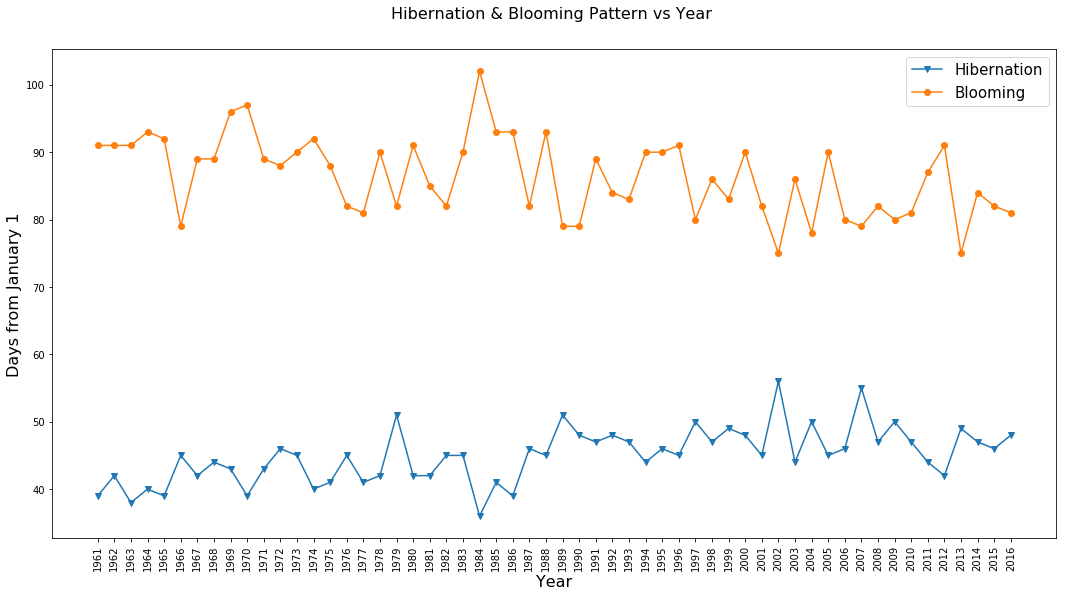

In [38]:
fig = plt.subplots(figsize=(18,9))
plt.plot(year,Dj,'-v',label='Hibernation')
plt.plot(year,BDj,'-o',label='Blooming')
plt.xticks(year,rotation='vertical')
plt.legend(fontsize=15)
plt.title('Hibernation & Blooming Pattern vs Year ',y=1.05,  fontsize=16)
plt.ylabel('Days from January 1', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.show()

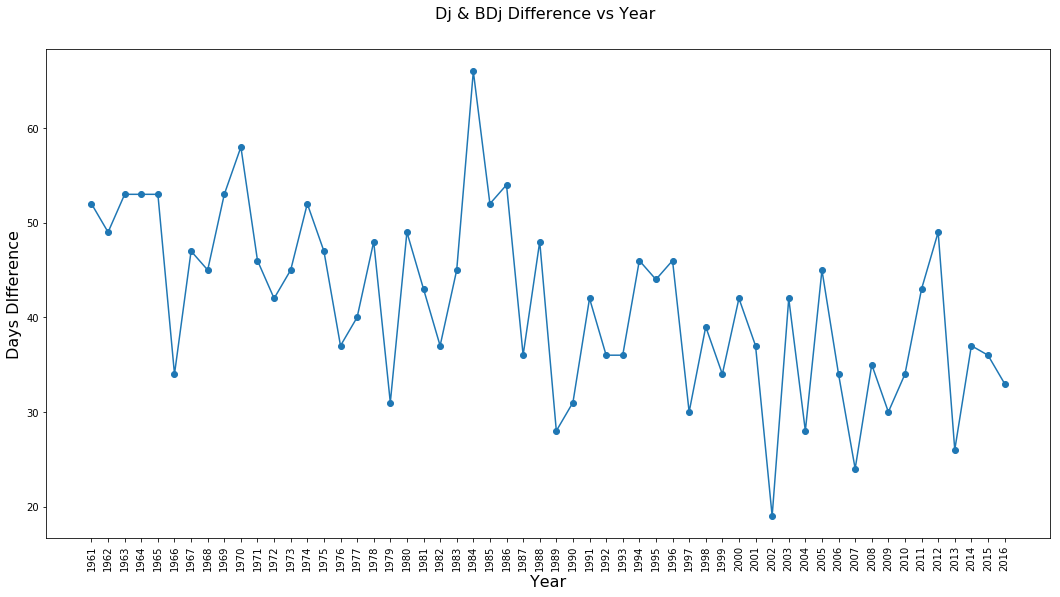

In [39]:
days_diff= np.subtract(BDj,Dj)
fig = plt.subplots(figsize=(18,9))
plt.plot(year,days_diff,'-o')
plt.xticks(year,rotation='vertical')
plt.title('Dj & BDj Difference vs Year ',y=1.05,  fontsize=16)
plt.ylabel('Days DIfference', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.show()

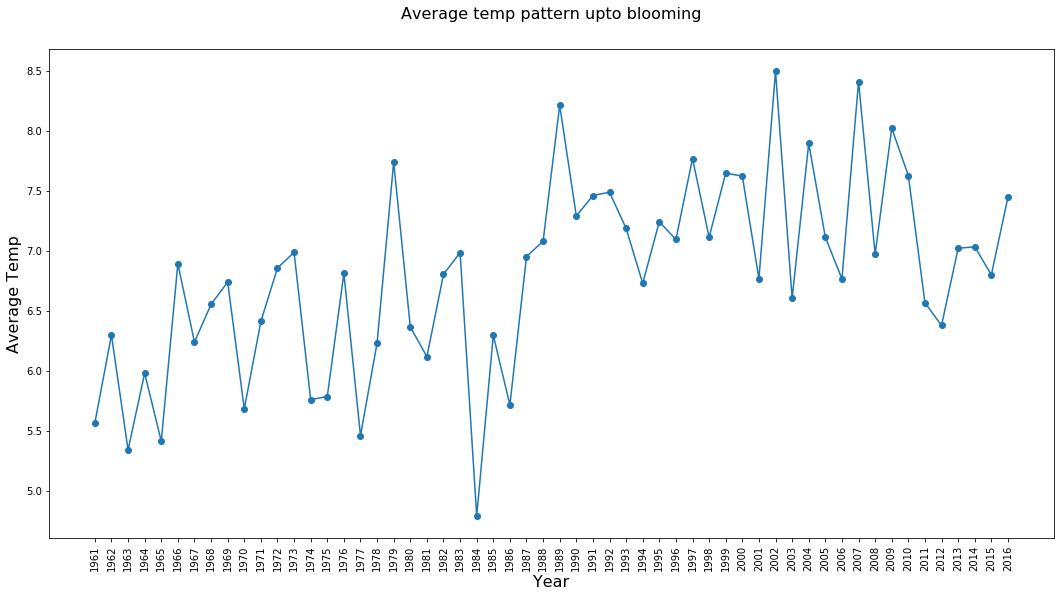

In [40]:
fig = plt.subplots(figsize=(18,9))
plt.plot(year,TEMP,'-o')
plt.xticks(year,rotation='vertical')
plt.title('Average temp pattern upto blooming',y=1.05,  fontsize=16)
plt.ylabel('Average Temp', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.show()

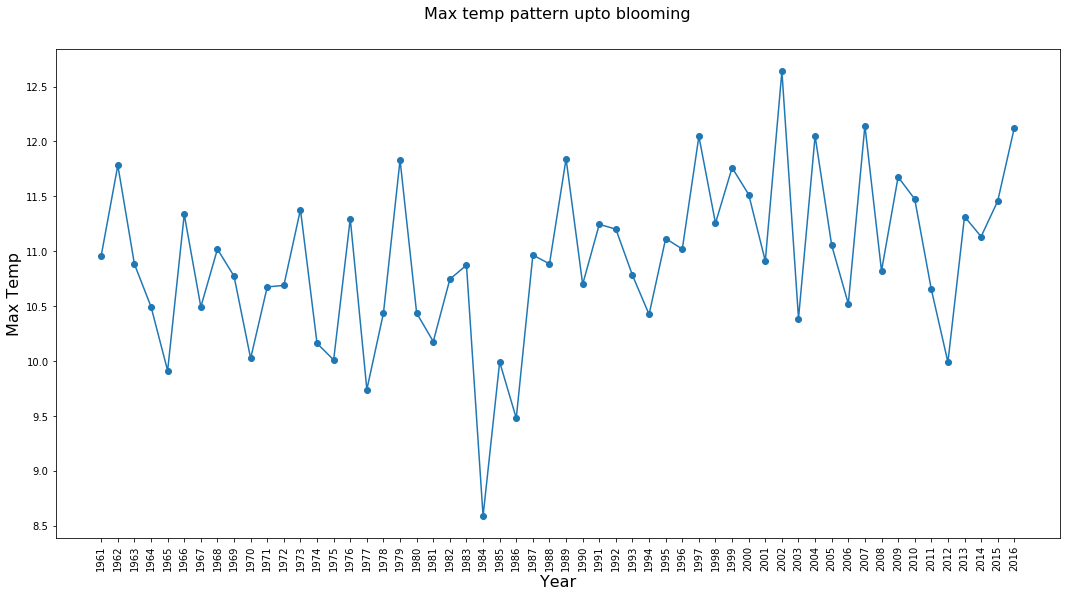

In [41]:
fig = plt.subplots(figsize=(18,9))
plt.plot(year,M_TEMP,'-o')
plt.xticks(year,rotation='vertical')
plt.title('Max temp pattern upto blooming',y=1.05,  fontsize=16)
plt.ylabel('Max Temp', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.show()

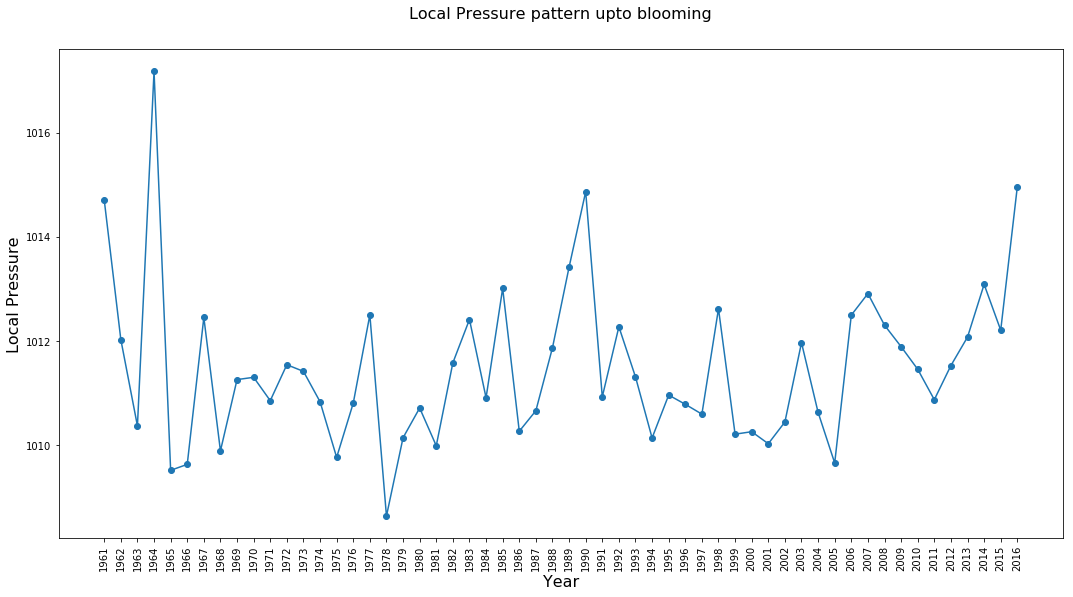

In [42]:
fig = plt.subplots(figsize=(18,9))
plt.plot(year,L_P,'-o')
plt.xticks(year,rotation='vertical')
plt.title('Local Pressure pattern upto blooming',y=1.05,  fontsize=16)
plt.ylabel('Local Pressure', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.show()

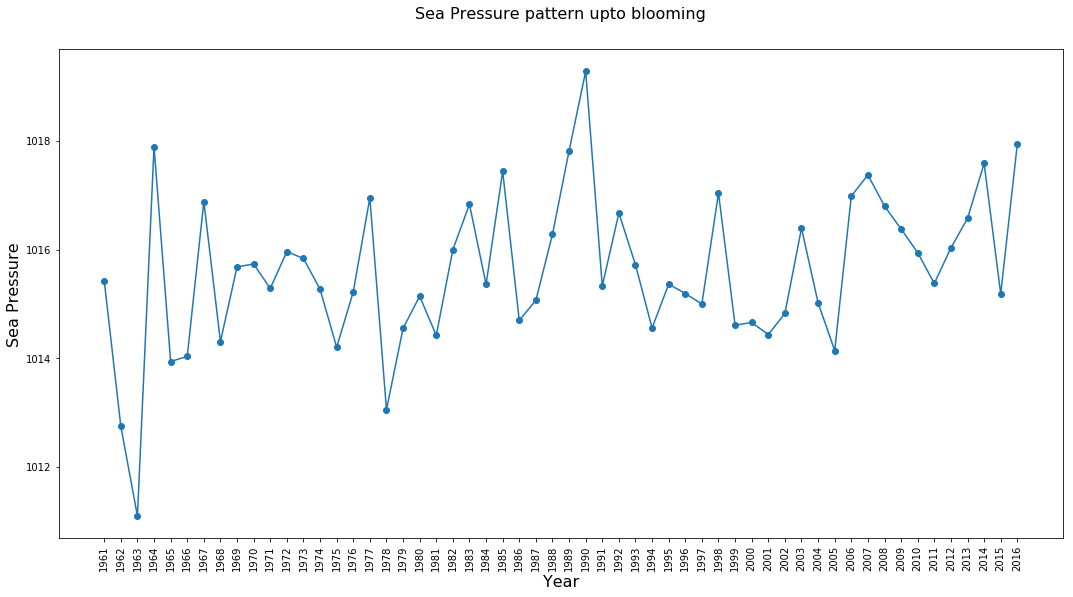

In [43]:
fig = plt.subplots(figsize=(18,9))
plt.plot(year,S_P,'-o')
plt.xticks(year,rotation='vertical')
plt.title('Sea Pressure pattern upto blooming',y=1.05,  fontsize=16)
plt.ylabel('Sea Pressure', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.show()

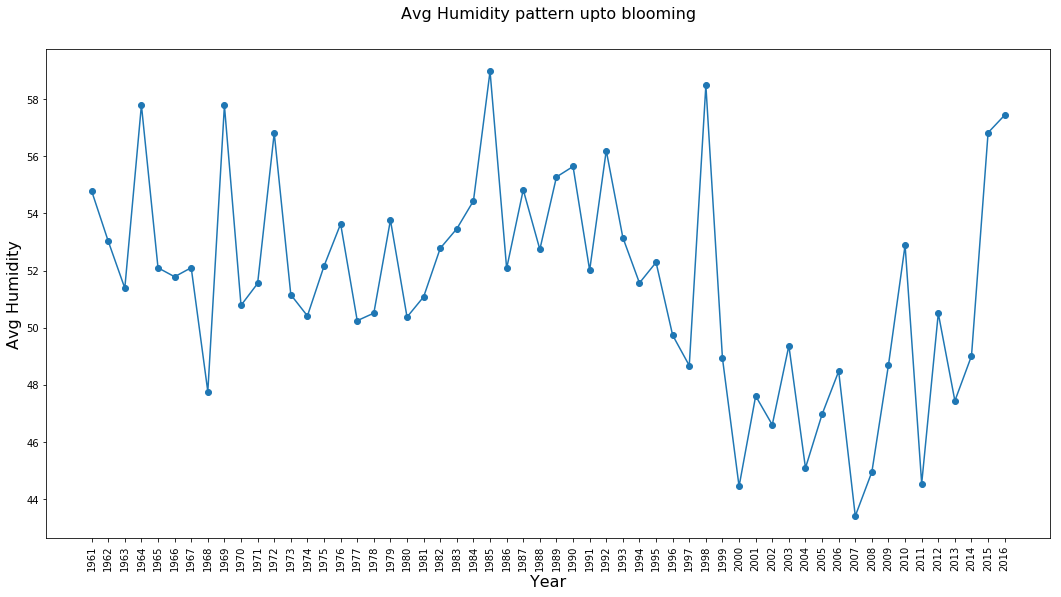

In [44]:
fig = plt.subplots(figsize=(18,9))
plt.plot(year,A_H,'-o')
plt.xticks(year,rotation='vertical')
plt.title('Avg Humidity pattern upto blooming',y=1.05,  fontsize=16)
plt.ylabel('Avg Humidity', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.show()

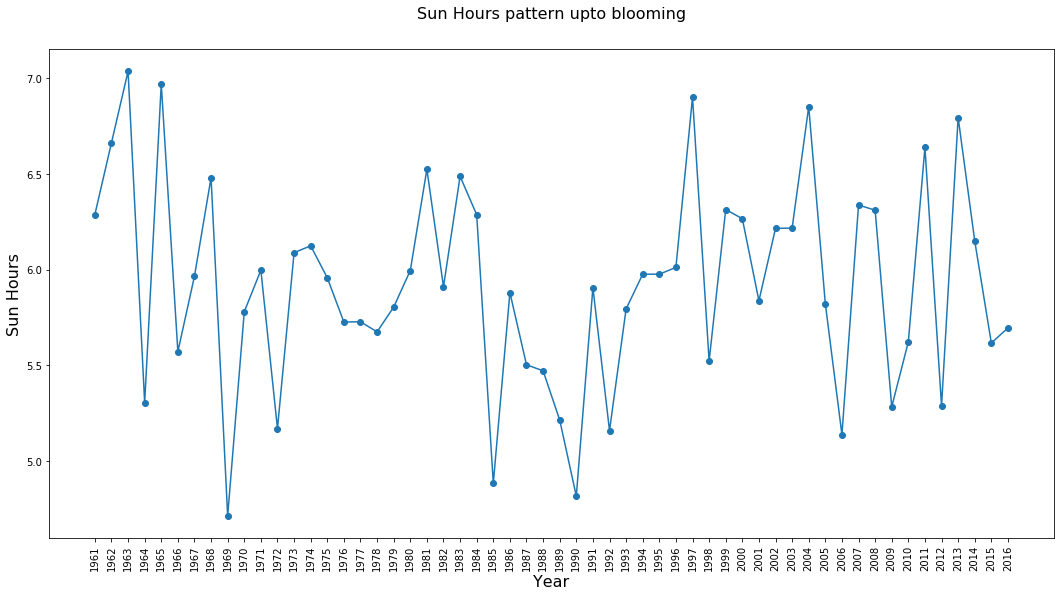

In [45]:
fig = plt.subplots(figsize=(18,9))
plt.plot(year,S_H,'-o')
plt.xticks(year,rotation='vertical')
plt.title('Sun Hours pattern upto blooming',y=1.05,  fontsize=16)
plt.ylabel('Sun Hours', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.show()

# DISCUSSION

Weather pattern has been changed over the years. It is clearly visible from the graph of Average Temperature. Average temperature has been increased though fluctuating. And it has direct impact on hibernation period. As hibernation period is dependent on average temperature. Hibernation period Dj have been delayed compared to the 1960s or 1970s. Blooming is occuring earlier in recent years and the gap between the hibernation and blooming also deccresed. Sea pressure and average humidity might have affected the phenomenon.